In [ ]:
### Arjun Bhan
### 10/8/21
import pandas as pd

1


In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

2

In [ ]:
df['target']=df['quality']>=7

In [ ]:
df=df.drop(columns=['quality'])

In [ ]:
df['target'].replace({False:0,True:1},inplace=True)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


3

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

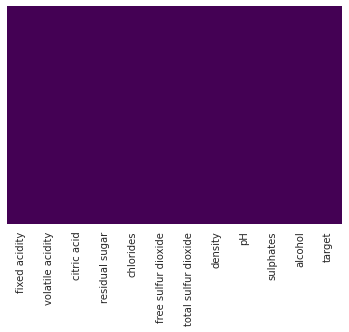

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

#4

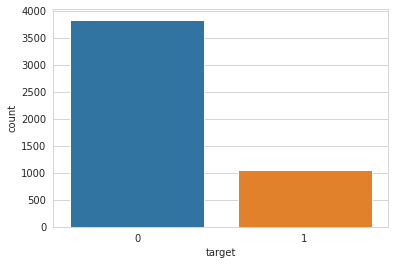

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df);

5

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [ ]:
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

6

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

7

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
probs = clf.predict_proba(X_test)[:,1]
probs[:10]

array([2.00536934e-01, 8.53238833e-01, 9.27449851e-01, 3.76757558e-01,
       9.15063949e-01, 3.70157314e-09, 4.23265027e-04, 3.86523007e-01,
       5.00656406e-01, 1.41176506e-06])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,roc_curve, auc



Accuracy.........: 70.6803
Precision........: 40.7942
Recall...........: 68.6930
FP Rate...........:28.7467
ROC AUC (probs)..: 75.2752
Confusion matrix.:
 [[813 328]
 [103 226]]


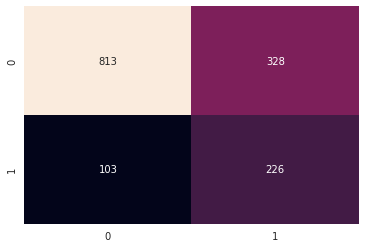

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
specificity=recall_score(y_test, y_pred, pos_label=0)
roc = roc_auc_score(y_test, probs)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........:{(1-specificity) * 100:.4f}")
print(f"ROC AUC (probs)..: {roc * 100:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix.:\n {cm}")

#This is nicer
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

Question #8

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_df = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': threshold})
roc_df.iloc[100:150,:]

,tpr,fpr,threshold
100,0.340426,0.083260,0.881101
101,0.346505,0.083260,0.880307
102,0.346505,0.085013,0.879286
103,0.355623,0.085013,0.876116
104,0.355623,0.085890,0.875444
105,0.361702,0.085890,0.875097
106,0.361702,0.086766,0.874965
107,0.364742,0.086766,0.874585
108,0.370821,0.086766,0.874205
109,0.370821,0.087642,0.868336


In [ ]:
import matplotlib.pyplot as plt

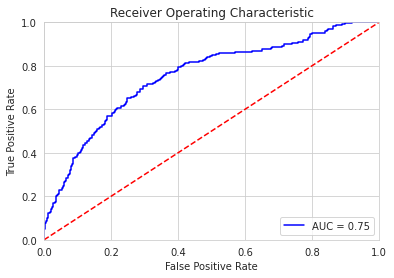

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCcuve.png')
plt.show()

In [ ]:
y_pred_new = (probs>0.865175)*1

In [ ]:
y_pred_new

array([0, 0, 1, ..., 0, 1, 1])



Accuracy.........: 78.8435
Precision........: 53.9130
Recall...........: 37.6900
FP Rate...........:9.2901
ROC AUC (probs)..: 75.2752
Confusion matrix.:
 [[1035  106]
 [ 205  124]]


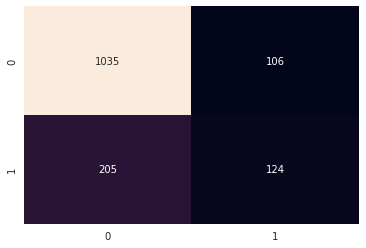

In [ ]:
accuracy = accuracy_score(y_test, y_pred_new)
precision=precision_score(y_test, y_pred_new)
recall=recall_score(y_test, y_pred_new)
specificity=recall_score(y_test, y_pred_new, pos_label=0)
roc = roc_auc_score(y_test, probs)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........:{(1-specificity) * 100:.4f}")
print(f"ROC AUC (probs)..: {roc * 100:.4f}")

cm = confusion_matrix(y_test, y_pred_new)
print(f"Confusion matrix.:\n {cm}")

#This is nicer
sns.heatmap(cm, annot=True,fmt='d',cbar=False);